We assume the following data generation model:
$$
y=x\beta + \varepsilon
$$
In the OLS setting, we are finding $\hat{\beta}$ such that 
$$
\|y-x\beta\|^2,
$$
is minimized. LASSO is popular model selection technique by introducing an l1 penalization term into the objective function, i.e.:
$$
\|y-x\beta\|^2 + \lambda |\beta|.
$$

## generating data

In [159]:
set.seed(777)
nObs = 1000   # num of observations
nFeature = 100
nonZero  = 10   # num of non-zero components

x = matrix(runif(nObs*nFeature, -1, 1), nObs, nFeature)
beta = c(1:nonZero, rep(0, nFeature-nonZero))
eps = 0.5 * rnorm(nObs)
y = x %*% beta + eps

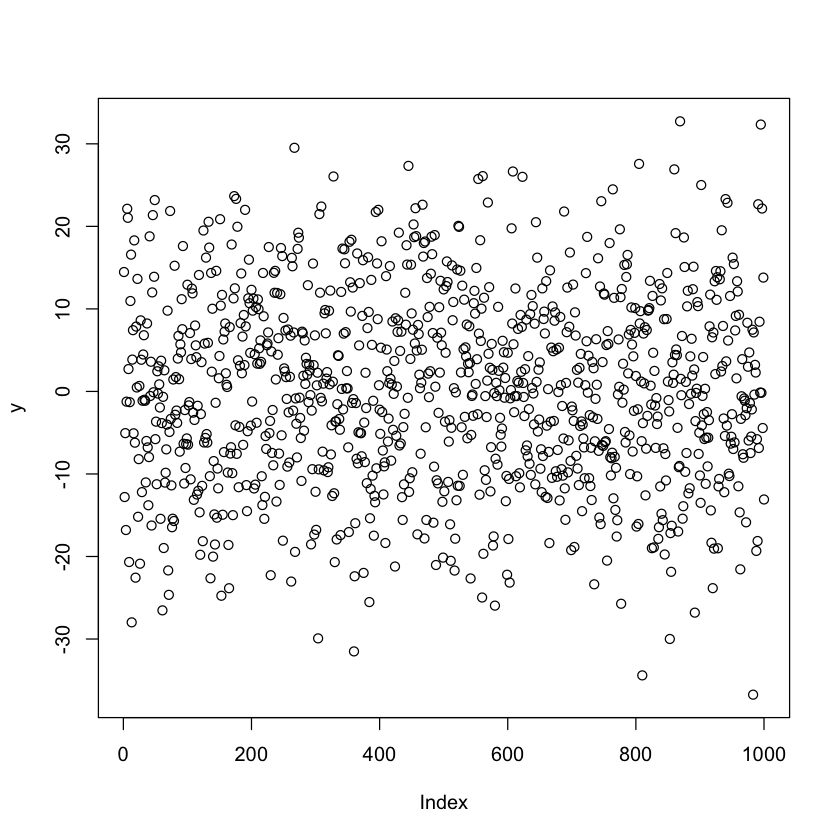

In [160]:
plot(y)

## perform OLS

In [161]:
summary(lm(y ~ 0 + x))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
x1,1.0071314623,0.02835722,35.51586922,2.097461e-173
x2,1.9563390012,0.02846487,68.72818955,0.000000e+00
x3,3.0255640425,0.02932535,103.17232041,0.000000e+00
x4,4.0063807922,0.02964991,135.12288188,0.000000e+00
x5,5.0142834647,0.02899622,172.92884008,0.000000e+00
x6,6.0405458073,0.02847263,212.15275077,0.000000e+00
x7,6.9642024314,0.02795760,249.09870160,0.000000e+00
x8,7.9670321459,0.02859813,278.58581207,0.000000e+00
x9,8.9718021281,0.02834098,316.56637443,0.000000e+00
x10,9.9739239074,0.02763600,360.90326790,0.000000e+00


## LASSO

In [162]:
library(glmnet)

In [163]:
fit = glmnet(x, y, intercept = FALSE, alpha = 1)

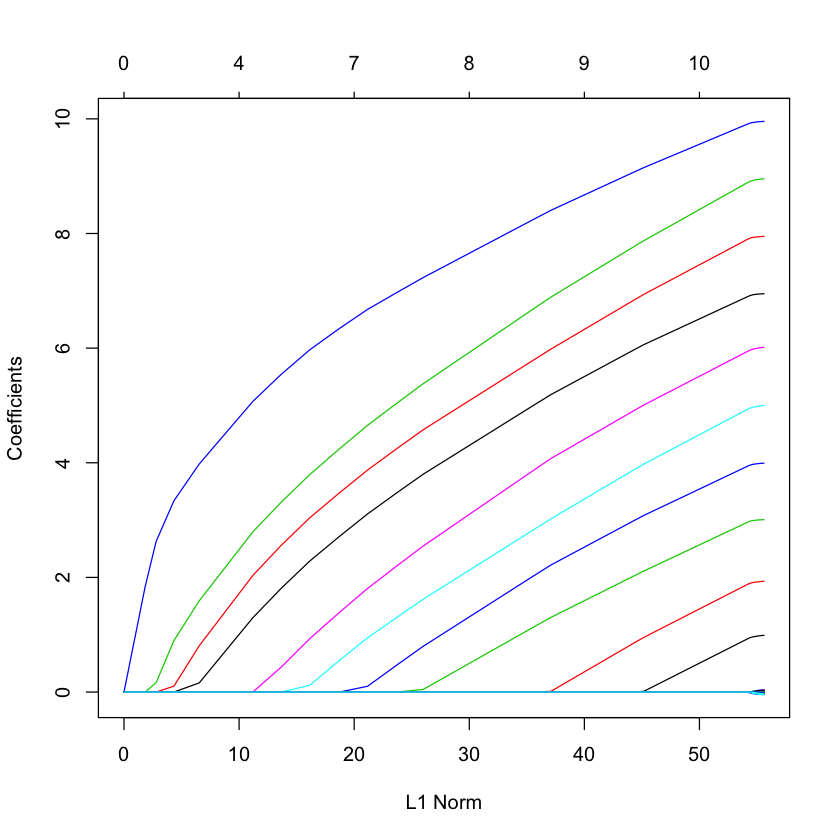

In [164]:
plot(fit)

## Cross-validation

In [150]:
cvfit = cv.glmnet(x, y, intercept = FALSE, alpha = 1, nfolds=5)

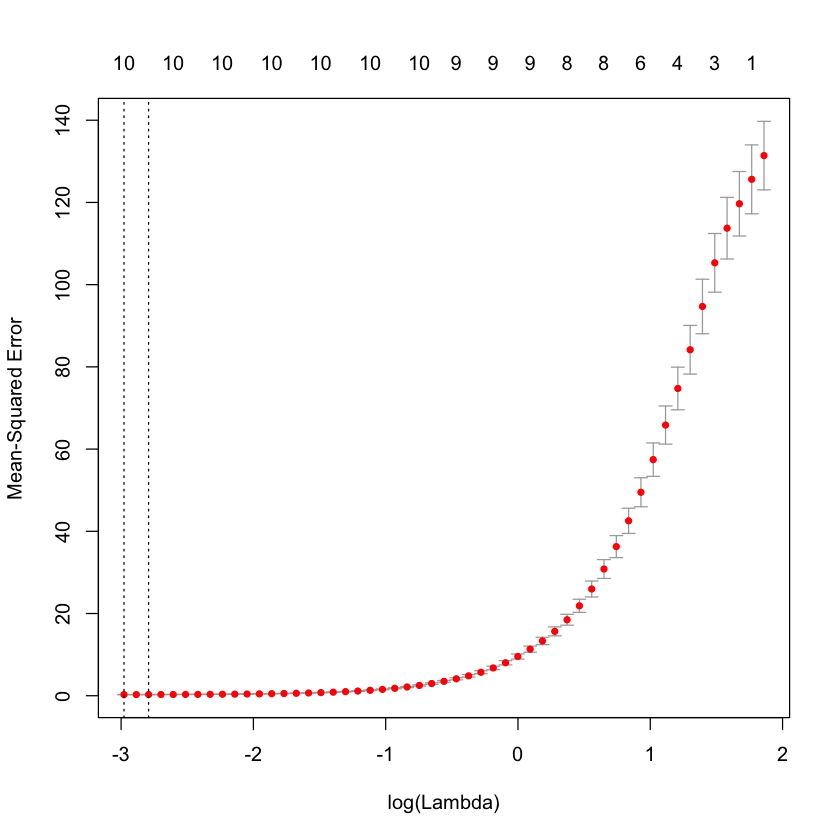

In [151]:
plot(cvfit)

In [153]:
cvfit$lambda.1se

[1] 0.06129684

In [154]:
coef(cvfit, s = "lambda.1se")

101 x 1 sparse Matrix of class "dgCMatrix"
                   1
(Intercept) .       
V1          0.899986
V2          1.850136
V3          2.935957
V4          3.913514
V5          4.903068
V6          5.914283
V7          6.872237
V8          7.869395
V9          8.856614
V10         9.885611
V11         .       
V12         .       
V13         .       
V14         .       
V15         .       
V16         .       
V17         .       
V18         .       
V19         .       
V20         .       
V21         .       
V22         .       
V23         .       
V24         .       
V25         .       
V26         .       
V27         .       
V28         .       
V29         .       
V30         .       
V31         .       
V32         .       
V33         .       
V34         .       
V35         .       
V36         .       
V37         .       
V38         .       
V39         .       
V40         .       
V41         .       
V42         .       
V43         .       
V44         

In [155]:
summary(lm(y ~ 0 + x[,1:10]))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
"x[, 1:10]1",1.006458,0.02716361,37.05170,3.251357e-189
"x[, 1:10]2",1.957749,0.02731910,71.66229,0.000000e+00
"x[, 1:10]3",3.034995,0.02790935,108.74473,0.000000e+00
"x[, 1:10]4",4.013445,0.02797218,143.47989,0.000000e+00
"x[, 1:10]5",5.014180,0.02784248,180.09100,0.000000e+00
"x[, 1:10]6",6.023103,0.02734159,220.29089,0.000000e+00
"x[, 1:10]7",6.969635,0.02684305,259.64397,0.000000e+00
"x[, 1:10]8",7.981158,0.02711291,294.36740,0.000000e+00
"x[, 1:10]9",8.974496,0.02717120,330.29446,0.000000e+00
"x[, 1:10]10",9.973981,0.02642152,377.49456,0.000000e+00
